In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

Dosya okuma işlemi

In [ ]:
data_country = pd.read_csv("/country_level_data_0.csv")

In [ ]:
data_country.info

In [ ]:
print(data_country.describe())

Datasetini düzenleme

In [ ]:
#veri setinde her kolonda kaç tane boş veri var
print(data_country.shape) #veri setindeki satır ve sütun sayısı
print(data_country.isna().sum())

(217, 49)
region_id                                                                                  0
country_name                                                                               1
gdp                                                                                        1
composition_food_organic_waste_percent                                                    41
composition_glass_percent                                                                 46
composition_metal_percent                                                                 47
composition_other_percent                                                                 42
composition_paper_cardboard_percent                                                       41
composition_plastic_percent                                                               42
composition_rubber_leather_percent                                                       164
composition_wood_percent                                    

Datasetinde çok fazla boş veri olduğu için bunları doldurmamız gerekli 
Bunun için 1. olarak kayıp verilerin türünü bululyoruz
değeri float olan veriler için bulunduğu stunun ortalama değeri ile dolduruyoruz.
değeri float olmayan veriler için bir sonraki dolu veriyi yazıyoruz.


In [ ]:
for x in data_country.columns:
    if isinstance(data_country[x][0], float):
        data_country.fillna({x: data_country[x].mean()}, inplace=True)
    else:
        data_country.fillna(method='bfill', inplace=True)

data_country.to_csv('duzenlenmis_data.csv')#oluşturduğumuz yeni datayı yeni bir csv dosyasına kaydediyoruz

In [ ]:
plt.clf()
data = pd.read_csv("duzenlenmis_data.csv")
print(data.describe())

Corelasyon matrisini anlaşılabilir kılabilmek için verilerden birazını siliyoruz

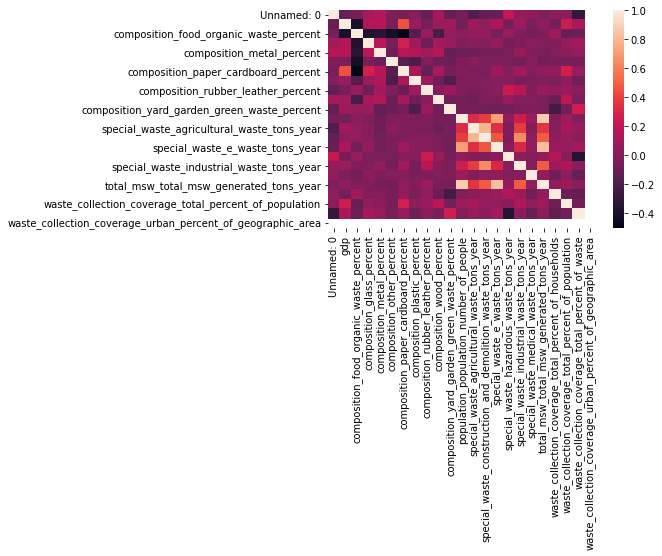

In [ ]:
corrdata = data.drop(['where_where_is_this_data_measured','waste_treatment_waterways_marine_percent','waste_treatment_unaccounted_for_percent','waste_treatment_sanitary_landfill_landfill_gas_system_percent'
                         ,'waste_treatment_recycling_percent','waste_treatment_other_percent', 'waste_treatment_open_dump_percent'
                         ,'waste_treatment_landfill_unspecified_percent', 'waste_treatment_incineration_percent', 'waste_treatment_controlled_landfill_percent'
                         ,'waste_treatment_compost_percent', 'waste_treatment_anaerobic_digestion_percent', 'waste_collection_coverage_urban_percent_of_waste'
                         ,'waste_collection_coverage_urban_percent_of_population', 'waste_collection_coverage_urban_percent_of_households'
                         ,'waste_collection_coverage_total_percent_of_geographic_area', 'waste_collection_coverage_rural_percent_of_waste', 'waste_collection_coverage_rural_percent_of_population'
                         ,'waste_collection_coverage_rural_percent_of_households','waste_collection_coverage_rural_percent_of_geographic_area'], axis=1)

cor = corrdata.corr()
sns.heatmap(data=cor)

K-means clustering

data içerisindeki corelasyon matrixde koyu renkli olan kolonları iloc komutu ile ayıklıyoruz

In [ ]:
X = data.iloc[:,[3,4,5,6,7,8,9,10,11,12]].values
"""
drop_features = list()
counter = 0
for x in data.columns:
    if isinstance(data[x][0], float):
        counter +=1
    else:
        drop_features.append(counter)
        counter += 1

print(drop_features)
"""
#X = data.iloc[:,[3,4,5,6,7,8,9]].values

'\ndrop_features = list()\ncounter = 0\nfor x in data.columns:\n    if isinstance(data[x][0], float):\n        counter +=1\n    else:\n        drop_features.append(counter)\n        counter += 1\n\nprint(drop_features)\n'

Öncelikle Kmeans için k değerini en uygun seçebilmek için elbow metodunu oluşturacağız. Bu metodla çıkan grafikte kırılma olan noktayı k değeri olarak seçeceğiz 

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

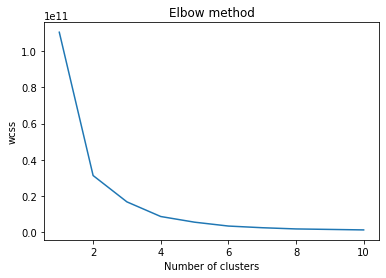

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

kmeans için kocu çalıştırıyoruz albow metundan bulduğumuz 4 ü de k değeri yerine ekliyoruz

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

oluşacak kümeler için hangi kümede hangi ülkenin olduğunu bilmemiz gerek.
bunların her birini ayrı bir liste içine kayıt ediyoruz

In [ ]:
liste = data[data.columns[2]].values.tolist()
kume1 = list()
kume2 = list()
kume3 = list()
kume4 = list()


In [ ]:
print(y_kmeans)

[3 0 0 0 1 1 3 0 0 3 1 1 0 0 1 0 0 0 3 1 3 0 3 0 2 0 0 0 1 0 0 0 1 1 1 3 0
 0 0 0 0 0 0 0 3 0 3 1 1 1 1 0 0 1 0 0 0 0 0 1 3 0 1 0 1 1 0 3 1 0 0 1 0 0
 0 3 3 0 1 0 1 0 1 0 3 0 3 0 1 0 2 0 0 1 3 1 0 0 1 3 0 0 0 0 3 1 1 0 3 0 0
 0 1 0 0 3 2 3 2 3 0 1 0 0 3 3 0 0 0 1 0 3 0 1 0 0 3 0 3 0 1 0 0 0 1 1 0 0
 1 3 0 3 0 0 3 0 3 3 3 0 0 1 2 3 3 0 1 0 0 2 0 0 0 1 0 3 0 0 3 3 1 1 0 3 3
 0 3 0 0 0 0 0 0 0 3 0 3 0 1 0 0 0 3 1 0 0 0 3 3 0 0 0 0 0 0 0 0]


y_kmeans bize her verinin hangi kümede olduğunu gösterir.
bundan yararlanarak iflerle bunları kontrol edip her veriyiy kendi küme listesine dahil ediyoruz.

In [ ]:

for i in range(0,y_kmeans.size):
    if y_kmeans[i] == 0:
        kume1.append(liste[i])
    elif y_kmeans[i] == 1:
        kume2.append(liste[i])
    elif y_kmeans[i] == 2:
        kume3.append(liste[i])
    else:
        kume4.append(liste[i])

kümeleri scatter ile tabloda gösteriyoruz
her küme için kümelerde bulunan ülkelerin isimlerini de yazdırıyoruz.

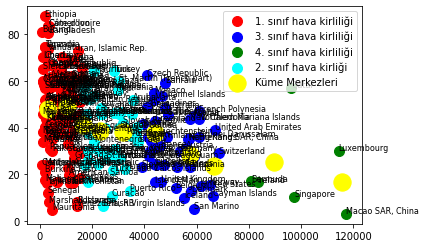

'\ndosya = open("kume4.txt", "w")\nfor x in kume4:\n    dosya.write(x)\n    dosya.write(" ")\n'

In [ ]:
size = 8
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = '1. sınıf hava kirliliği')
for i in range(len(kume1)):
    plt.annotate(kume1[i], (X[y_kmeans == 0, 0][i], X[y_kmeans == 0, 1][i] + 0.2), size = size)

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = '3. sınıf hava kirliliği')
for i in range(len(kume2)):
    plt.annotate(kume2[i], (X[y_kmeans == 1, 0][i], X[y_kmeans == 1, 1][i] + 0.2), size = size)

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = '4. sınıf hava kirliliği')
for i in range(len(kume3)):
    plt.annotate(kume3[i], (X[y_kmeans == 2, 0][i], X[y_kmeans == 2, 1][i] + 0.2), size = size)

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = '2. sınıf hava kirliği')
for i in range(len(kume4)):
    plt.annotate(kume4[i], (X[y_kmeans == 3, 0][i], X[y_kmeans == 3, 1][i] + 0.2), size = size)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Küme Merkezleri')
plt.legend()
plt.show()
"""
dosya = open("kume4.txt", "w")
for x in kume4:
    dosya.write(x)
    dosya.write(" ")
"""

Hierartical clustering

öncelikle dendrogram grafiğini oluşturup kaç kümeleme olduğunu buluyoruz

In [ ]:
den=sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

Hierartical clustering metodu uygulayıp plt.chart ile kümelemeyi görselleştiriyoruz.

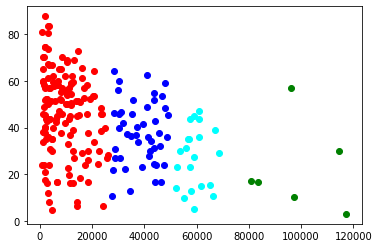

In [ ]:
ac=AgglomerativeClustering(n_clusters=4)
yhead=ac.fit_predict(X)
plt.scatter(X[yhead == 0, 0], X[yhead == 0, 1], color="red")
plt.scatter(X[yhead == 1, 0], X[yhead == 1, 1], color="blue")
plt.scatter(X[yhead == 2, 0], X[yhead == 2, 1], color="green")
plt.scatter(X[yhead == 3, 0], X[yhead == 3, 1], color="cyan")
plt.show()

Sonuç olarak her iki algoritmanın da benzer sonuç verdiğini görebiliriz